In [ ]:
!pip install ipywidgets

In [2]:
from IPython.display import display
from ipywidgets import HTML

In [3]:
import numpy as np

np.random.seed(42) # Zufall fixieren für Musterlösung

# Machine Learning - Aufgabenblatt 3

## Datensatz

In diesem Aufgabenblatt verwenden wir den Iris-Datensatz.

Der Iris-Datensatz wird in vielen Beispielen und Büchern über Classification in Machine Learning verwendet.
Sie finden also online zusätzliche Informationen und Lösungs-Ansätze zu diesem Datensatz.
Der Datensatz ist sogar in `sklearn` integriert, sprich wir können den Iris-Datensatz direkt über `sklearn.datasets`  laden.

Der Iris-Datensatz ist hier beschrieben: https://en.wikipedia.org/wiki/Iris_flower_data_set

| Feature            | Descriptiopn                                                                  |
|--------------------|-------------------------------------------------------------------------------|
| specie             | Spezie der Blume                                                              |
| sepal length (cm)  | Länge des Kelchblattes der Blume (in Zentimeter).                             |
| sepal width (cm)   | Breite des Kelchblattes der Blume (in Zentimeter).                            |
| petal length (cm)  | Länge des Kronblattes der Blume (in Zentimeter).                              |
| petal width (cm)   | Breite des Kelchblattes der Blume (in Zentimeter).                            |

## Ziel

Das Ziel ist es anhand der Features vorhersagen zu können, um welche Blumenart es sich handelt.
Wir sagen also basierend auf Inputs (`Features`) ein Output (`Label`, auch `Klasse`) voraus - wir machen also eine `Classification`.

![Ziel des Aufgabenblattes](./img/goal.png)

## Setup

Im Setup sind bereits notwendige Schritte implementiert, die Sie im Aufgabenblatt 2 selbst implementierten.
**Nach Aufgabenblatt 2 sollten die Schritte klar sein!**

Wir laden hier die Daten über `sklearn.datasets`, und teilen anschliessend die Features in `X` und Zielvariable in `y` auf.

In [4]:
from sklearn import datasets

# Laden des Iris-Datensatzes über sklearn.datasets
iris = datasets.load_iris(as_frame=True)

# Aufteilen der Daten in Features und Zielvariable
X = iris.data
y = iris.target

# iris.target ist als Nummer abgespeichert (0, 1 oder 2), hier schlüsseln wir diese Codierung in die Spezien-Namen auf (target_names).
y = y.apply(lambda key: iris.target_names[key]).rename('specie')

display(HTML('X:'))
display(X.head())
display(HTML('y:'))
display(y.to_frame().head())

HTML(value='X:')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


HTML(value='y:')

,specie
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


Analog zum Aufgabenblatt 2 machen wir hier ein `Test-Set`, `Validation-Set` und `Train-Set`, welche wir in den Aufgaben verwenden werden.

In [5]:
from sklearn.model_selection import train_test_split

# Split in Test-Set and Data-Set
X_data, X_test, y_data, y_test = train_test_split(X, y, random_state=2, stratify=y)
# Split Data-Set in Train-Set and Validation-Set
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, random_state=2, stratify=y_data)

print("Test-Set", X_test.shape)
print("Data-Set", X_data.shape)
print("Train-Set", X_train.shape)
print("Validation-Set", X_val.shape)

Test-Set (38, 4)
Data-Set (112, 4)
Train-Set (84, 4)
Validation-Set (28, 4)


Für `seaborn` in der Datenanalyse (Aufgabe 1) setzen wir `X_data` und `y_data` zu einem DataFrame `df_data` zusammen.

In [6]:
import pandas as pd

df_data = pd.concat([X_data, y_data.to_frame()], axis=1)

display(df_data)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specie
147,6.5,3.0,5.2,2.0,virginica
133,6.3,2.8,5.1,1.5,virginica
10,5.4,3.7,1.5,0.2,setosa
79,5.7,2.6,3.5,1.0,versicolor
39,5.1,3.4,1.5,0.2,setosa
...,...,...,...,...,...
85,6.0,3.4,4.5,1.6,versicolor
87,6.3,2.3,4.4,1.3,versicolor
15,5.7,4.4,1.5,0.4,setosa
119,6.0,2.2,5.0,1.5,virginica


Folgende Funktion müssen Sie in den Aufgaben verwenden. Die Umsetzung (der Code) der Funktion **muss nicht verstanden** werden. 
Die Funktion hilft die `Decision Region` eines Classifiers zu plotten. Wir verwenden die Funktion in späteren Aufgaben, um die Classifiers besser zu verstehen. 

In [7]:
import numpy as np
from sklearn.linear_model._base import LinearClassifierMixin
import pandas as pd
from matplotlib.colors import ListedColormap

def plot_decision_regions(clf: LinearClassifierMixin, data: pd.DataFrame, x: str, y: str, colors = None, num_steps=1000):
    """
    Funktion zum Plotten der Decision Region eines Classification Modells.
    Es wird nicht erwartet, dass Sie die Umsetzung dieser Funktion verstehen.
    :param clf: Classification Modell
    :param data: Daten als DataFrame
    :param x: Spaltenname der X-Achse
    :param y: Spaltenname der Y-Achse
    :param colors: Farben (optional)
    :param num_steps: Auflösung des Decision Region Plots.
    :return:
    """
    xs = data[x]
    ys = data[y]
    x_min, x_max = xs.min() - 1, xs.max() + 1
    y_min, y_max = ys.min() - 1, ys.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, abs(x_max - x_min) / num_steps), np.arange(y_min, y_max, abs(y_max - y_min) / num_steps))

    zz = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)

    if colors is not None:
        # Map labels to color index for plt.contourf
        zz = np.vectorize(lambda x: list(colors.keys()).index(x))(zz)
        cmap = ListedColormap(list(colors.values()))
        plt.contourf(xx, yy, zz, alpha=0.25, cmap=cmap, extend='both')
    else:
        zz = np.vectorize(lambda x: list(clf.classes_).index(x))(zz)
        plt.contourf(xx, yy, zz, alpha=0.25, extend='both')

In [8]:
# Farben werden in der Musterlösung wiederverwendet um ein einheitliches Farbschema über die Aufgaben hinweg zu haben.
# Für die Lösung der Aufgaben sind sie nicht relevant.
colors = {
    'versicolor': 'red',
    'virginica': 'blue',
    'setosa': 'green'
}

## Aufgabe 1 - Daten Analyse

Wir möchten Anhand unserer Features (wie `sepal length (cm)`) die Blumenspezie (`specie`) vorhersagen können.

In Aufgabe 2 werden wir dafür ein Modell erstellen. In Aufgabe 1 werden wir erst einmal die Daten mit ein paar Plots genauer anschauen.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Aufgabe 1.1 - Histogram der Zielvariable

Es macht immer Sinn, sich die **Verteilung der Zielvariable** anzuschauen.
Bei einer `Classification` kann man einfach die Anzahl Datenpunkte pro `Klasse` ausgeben.

1. Erstellen Sie ein Plot der Zielvariable `specie` mittels `sns.countplot` (oder `sns.histplot`)
2. Interpretieren Sie den Plot.

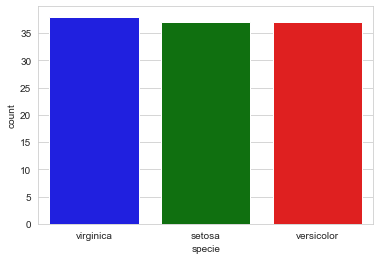

In [10]:
# 1. mittels histplot
sns.histplot(data=df_data, x='specie')
plt.close() # Do not show plot

# 1. mittels countplot (palette=colors ist nicht Teil der Aufgabenstellung).
sns.countplot(data=df_data, x='specie', palette=colors)
plt.show()

2\.
Wir haben 3 `Klassen` und von allen `Klassen` über 35 Datenpunkte.
Die Klassenverteilung ist **annähernd gleichverteilt**, wir haben von allen `Klassen` (etwa) gleich viele Datenpunkte.

### Aufgabe 1.2 - `sns.stripplot`, `sns.violinplot`

1. Erstellen Sie einen `scatter plot` vom `Data-Set` (`df_data`) für das Feature `sepal width (cm)` und der Klasse `specie` mittels `sns.stripplot`. Der Plot heisst `stripplot` weil es die Datenpunkte vom `scatter plot` in einem Streifen (engl. `stirp`) anordnet. Würden wir das nicht machen, könnten wir die Menge der Punkte schlechter beurteilen.
2. Wiederholen Sie Schritt 1 für alle Features. Dies kann man mittels `for` Schleife (einfacher) oder mit einem `sns.PairGrid` (schwieriger) machen. Die Spalten des DataFrames kann man mit `df_data.columns` auslesen.
3. Interpretieren Sie den erstellten Plot.
4. Wiederholen Sie Schritt 2 mit dem `sns.violinplot`.
5. (Extra) Es gibt noch weitere interessante Plots wie der `sns.swarmplot` oder den `sns.boxplot`.
6. (Extra) Was ist der Unterschied von `sns.stripplot` und `sns.violinplot`?

#### Hilfreiche Links

* `sns.stripplot`: https://seaborn.pydata.org/generated/seaborn.stripplot.html
* `sns.violinplot`: https://seaborn.pydata.org/generated/seaborn.violinplot.html
* A complete guide to plotting categorical variables: https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec

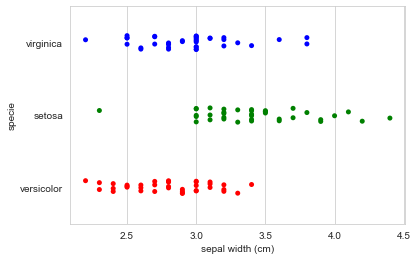

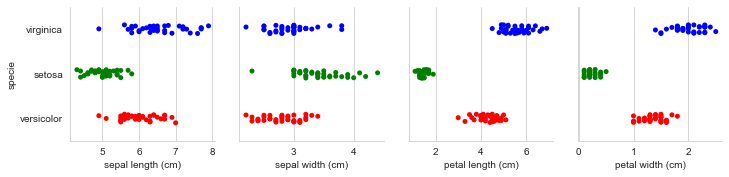

In [11]:
# 1. Nur ein Feature (x und y Achse könnten nach Aufgabenstellung auch vertauscht sein)
sns.stripplot(data=df_data, x='sepal width (cm)', y='specie', palette=colors)
plt.show()

# 2. Mit for Schleife
for col in df_data.drop(columns='specie').columns:
    sns.stripplot(data=df_data, x=col, y='specie', palette=colors)
    plt.close() # Plot nicht zeigen wegen Alternative unten

# 2. Alternative mit PairGrid (Plots sind in einer Zeile angeordnet)
g = sns.PairGrid(data=df_data, x_vars=df_data.drop(columns='specie'), y_vars=['specie'])
g.map(sns.stripplot, palette=colors)
plt.show()

3\.
Die `setosa` Art hat eher kleinere Kronblätter (`petal`) und sollte einfach zu klassifizieren sein.
Die `versicolor` und `virginica` unterscheiden und überschneiden sich ihre Verteilungen bei allen Features.
Ein **einzelnes** Feature würde bereits die Datenpunkte ein wenig klassifizieren können (da sie sich unterscheiden), aber sicherlich nicht perfekt (da sie sich überschneiden).
Wenn wir eine kombination von Features (z.B. alle vier Features) nehmen, kann es sein, dass `versicolor` und `virginica` in der Kombination perfekt klassifiziert werden können.
Ob dies der Fall ist, ist hier aber nicht zu sehen.

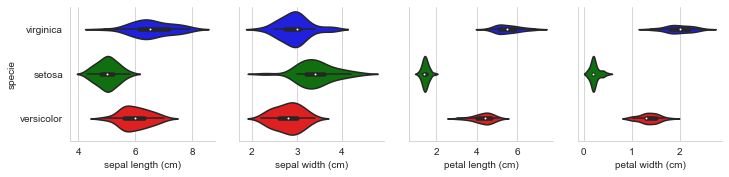

In [12]:
# 4. Mit for Schleife
for col in df_data.drop(columns='specie').columns:
    sns.violinplot(data=df_data, x='specie', y=col)
    plt.close()

# 4. Alternative mit PairGrid
g = sns.PairGrid(data=df_data, x_vars=df_data.drop(columns='specie'), y_vars=['specie'])
g.map(sns.violinplot, palette=colors)
plt.show()

/Users/beni/Documents/FHNW/cas_machine-learning-exercise/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/beni/Documents/FHNW/cas_machine-learning-exercise/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/beni/Documents/FHNW/cas_machine-learning-exercise/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/beni/Documents/FHNW/cas_machine-learning-exercise/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 51.4% of the points cannot be placed; you may want to de

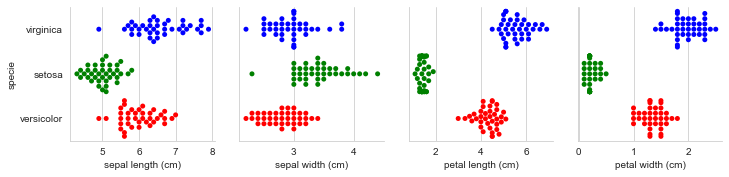

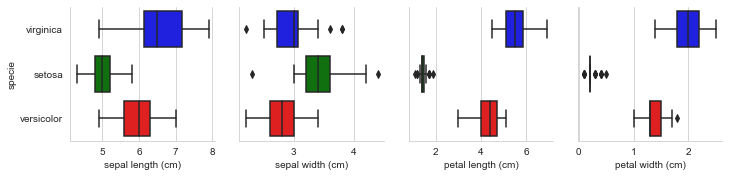

In [13]:
# 5. Extra: swarmplot
g = sns.PairGrid(data=df_data, x_vars=df_data.drop(columns='specie'), y_vars=['specie'])
g.map(sns.swarmplot, palette=colors)
plt.show()

# 5. Extra: boxplot
g = sns.PairGrid(data=df_data, x_vars=df_data.drop(columns='specie'), y_vars=['specie'])
g.map(sns.boxplot, palette=colors)
plt.show()

6\. (Extra)

Der `sns.stripplot` (wie auch der `sns.swarmplot`) plotten die tatsächlichen Datenpunkte.
Der Vorteil ist, wir sehen alle tatsächlichen Datenpunkte.
Der Nachteil ist, bei vielen Datenpunkten kommt es zu Überschneidungen, welche schwierig zu sehen sind.
Der `sns.violinplot` zeigt eine **Annäherung der Verteilung** des Features, viele Datenpunkte sorgen hier für kein Problem.
Extra: Der `sns.boxplot` zeigt **Statistiken über die Verteilung**, wie den Median, Quartile und allenfalls Outliers.

Im Code unten plotten wir den `sns.violinplot` (in grau) über den `sns.stripplot`, da sieht man den Zusammenhang noch einmal stark.
Beispielsweise beim Feature `petal width (cm)` und der Spezie `setosa`, ist es anhand der Datenpunkte schwierig zu erkennen, dass es mehr Datenpunkte nahe 0 hat, als nahe 0.5, beim `sns.violinplot` ist dies aber besser zu erkennen.

Achtung: Der `sns.violinplot` kann mit wenig Datenpunkten (oder falsch konfiguriert z.B. hoher `bw` Parameter) einen "falsche" angenäherte Verteilung erzeugen.
Und kann zu falschen Schlussfolgerungen führen. Vorsicht ist geboten!

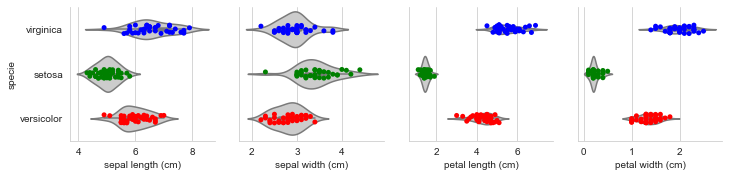

In [14]:
# 6. Extra: Visualisierung von stripplot auf dem violinplot
g = sns.PairGrid(data=df_data, x_vars=df_data.drop(columns='specie'), y_vars=['specie'])
g.map(sns.violinplot, color="0.8")
g.map(sns.stripplot, palette=colors)
plt.show()

### Schlusswort Aufgabe 1

Aufgabe 1 gibt Ihnen eine Idee der `Datenanalyse` für die `Classification`.
Wir haben ein verschiedene hilfreiche Plots, wie den `countplot`, den `stripplot` und den `violinplot`  gesehen.
Dies ist aber bei weitem nicht alles was man tun kann.
Wir haben in Aufgabe 1.2 alle Features unabhängig von einander angeschaut, man könnte die Feature Interaktionen bereits in der Datenanalyse untersuchen.

## Aufgabe 2 - Logistic Regression

In dieser Aufgabe erstellen wir unser erstes `Classification` Modell, ein `Logistic Regression` Modell.
Die `LogisticRegression` ist ein `Classification`-Modell und **kein** `Regression`-Modell, trotz des irreführenden Namens!

### Aufgabe 2.1 - Plot Features - `sns.scatterplot(..., hue='col')`

Wieder aus **didaktischen Gründen** (analog zu Aufgabenblatt 2) verwenden wir hier **lediglich 2 Features**, so können wir unsere Datenpunkte und trainierten Modelle 2-dimensional visualisieren.
Die X-Achse und Y-Achse sind jeweils die Features und die Farbe der Punkte (`hue`) ist das Label der Zielvariable.

Wir verwenden hier die Features `petal length (cm)` und `petal width (cm)`.

1. Visualisieren Sie die beiden Features `petal length (cm)` und `petal width (cm)` vom `Data-Set` (`df_data`) mittels `sns.scatterplot` und färben sie die Punkte mit dem `hue` Parameter nach der Zielvariable `specie` ein.
2. In Aufgabe 2.2 trainieren wir eine `LogisticRegression`, was genau wird dieses Modell schlussendlich machen? Überlegen Sie sich es am Plot aus Schritt 1.
3. (Extra) Was ist bei den Überlegungen aus Schritt 2 der Unterschied zur Regression?

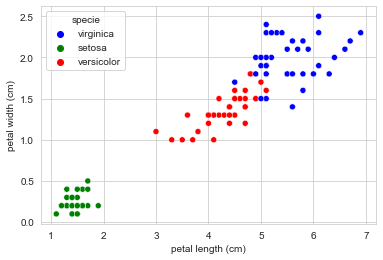

In [15]:
# 1.
sns.scatterplot(data=df_data, x='petal length (cm)', y='petal width (cm)', hue='specie', palette=colors)
plt.show()

2\.
Die Logistische Regression lernt (`fit`) mehrere `Decision Boundaries`, um den Feature-Raum in `Decision Regions` zu unterteilen.
Da die Logistic Regression linear ist, fitten wir `lineare Decision Boundaries` (`Hyper-Planes`).
Vereinfacht gesagt trennen wir den ganzen Plot (`Feature-Raum`) mit Linien (`Hyper-Planes`) in Teilräume (`Decision Regions`).

Visuell wird das dann in etwa so aussehen: Zwei Linien trennen den Plot in drei Regionen auf. Alle Punkte in einer Region werden einer Spezie z.B. `setosa` zugewiesen. (Die Linien sind hier von Auge gesetzt worden.)

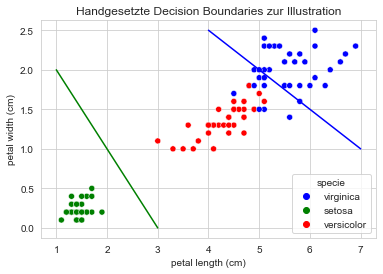

In [16]:
plt.title('Handgesetzte Decision Boundaries zur Illustration')
sns.scatterplot(data=pd.concat([X_data, y_data], axis=1), x='petal length (cm)', y='petal width (cm)', hue='specie', palette=colors)
# Diese Linien sind von Auge gesetzt, das Modell findet diese selbst.
plt.plot([1, 3], [2.0, 0.0], c='g')
plt.plot([4, 7], [2.5, 1.0], c='b')
plt.show()

3\. (Extra)
In der Regression lernen (`fit`) wir eine Funktion, die einen kontinourlieren Wert zurückgibt.
Wir haben eine zusätzliche Achse, die der Zielvariable entspricht.
In der Classification lernen wir ein oder mehrere `Decision Boundary`, die den `Feature Raum` in `Regionen` aufteilt.
Diese `Decision Regions` entsprechen jeweils einer möglichen `Klasse` der Zielvariable.
Wir haben **keine extra Achse** für die Zielvariable.
Dies ist auch der Grund wieso wir hier in der `Classification` 2 Features für die 2-dimensionale Darstellung verwenden können und in der `Regression` (Aufgabe 2 im Aufgabenblatt 2) nur 1 Feature für die 2-dimensionale Darstellung verwenden konnten.

### Aufgabe 2.2 - `sklearn.linear_model.LogisticRegression`

Analog zur `LinearRegression` vom Aufgabenblatt 2, trainieren wir hier die `LogisticRegression`.

1. Erstellen Sie eine `LogisticRegression` und trainieren Sie diese auf den Features `petal length (cm)` und `petal width (cm)` vom `Train-Set` (`X_train`, `y_train`).
2. Predicten (`clf.predict`) Sie die Vorhersagen auf dem `Validation-Set` (`X_val`). Hier müssen Sie wieder die entsprechenden Features selektieren.
3. Messen Sie die Genauigkeit (englisch Accuracy) mittels `sklearn.metrics.accuracy_score` von `y_val_hat` unseren Vorhersagen und `y_val` den tatsächlichen `Klassen`.
4. Visualisieren Sie die `Decision Boundary` von unserem Modell mit der Hilfe von der oben definierten `plot_decision_regions` Funktion. Was zeigt dieser Plot?
5. (Extra) In `sklearn.metrics` gibt es weitere Metriken, manche haben wir im Theorie Teil kennengelernt, wie den F1-Score (`f1_score`). Schauen Sie sich den `classification_report` an (Sammlung von solchen Metriken) und interpretieren Sie diese Metriken.

In [17]:
from sklearn.linear_model import LogisticRegression

# 1.
clf = LogisticRegression()
clf.fit(X_train[['petal length (cm)', 'petal width (cm)']], y_train)

# 2.
y_val_hat = clf.predict(X_val[['petal length (cm)', 'petal width (cm)']])

# 3.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val_hat, y_val))

0.9642857142857143


Wir haben eine Genauigkeit von ungefähr 96%. Also 96% der Datenpunkte wurden richtig klassifiziert und 4% wurden falsch klassifiziert.

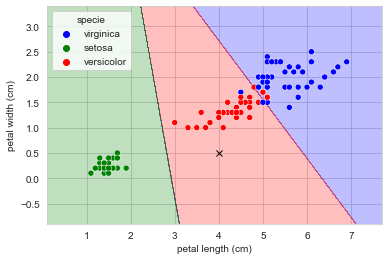

In [18]:
# 4.

# Plotten der Decision Regions und  Decision Boundaries
plot_decision_regions(clf, data=X_train, x='petal length (cm)', y='petal width (cm)', colors=colors)

# Plotten der Datenpunkte (scatter plot)
ax = sns.scatterplot(data=pd.concat([X_data, y_data], axis=1), x='petal length (cm)', y='petal width (cm)', hue='specie', palette=colors)

# Beispiel: Sage eine neue Blume mit petal length von 4cm und petal width von 0.5cm voraus
plt.plot([4], [0.5], marker='x', color='black')
plt.show()

4\.
Im Plot sehen wir die gefundenen `Decision Boundaries` und welche Regionen zu welcher Iris-Spezie zugeordnert werden.
Zum Beispiel, landet eine neue Blume mit `petal length (cm) = 4` und `petal width (cm) = 0.5` in der roten Region (schwarzes Kreuz **x**), also sagt das Modell `versicolor` voraus.

In [19]:
# 5. classification_report gibt viele Standard Metriken für die Classification zurück.
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_hat))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.90      0.95        10

    accuracy                           0.96        28
   macro avg       0.97      0.97      0.96        28
weighted avg       0.97      0.96      0.96        28



5\.
Wir sehen, wie bereits schon in der Daten Analyse (Aufgabe 1.2) vermutet, dass `setosa` perfekt klassifiziert wird - `precision` und `recall` und folglich auch der `f1-score` haben den höchstwert 1.0.
Die `precision` von 0.9 für `versicolor` bedeutet, dass wir auch **nicht** `versicolor` Datenpunkte im `Validation-Set` als `versicolor` klassifizieren.
Der `recall` von 1.0 für `versicolor` bedeutet, dass wir alle  `versicolor` Datenpunkte im `Validation-Set` richtig klassifizieren.
Die `precision` von 1.0 für `virginica` bedeutet, dass wir, wenn wir `virginica` vorhersagen, richtig liegen.
Der `recall` von 0.9 für `virginica` bedeutet, dass wir nicht alle  `virginica` Datenpunkte im `Validation-Set` richtig klassifizieren.
Zwischen den Blumenarten `versicolor` und `virginica` kommt es zu Fehlern, wir werden diese in der Aufgabe 2.3 mit der `Confusion Matrix` weiter
untersuchen.

### Aufgabe 2.3 - Confusion Matrix

In Aufgabe 2.2 haben wir ein Modell trainiert und die Genauigkeit gemessen.
Oft ist es aber interessant, wo genau das Modell die Fehler macht.
In der `Classification` bedeutet ein Fehler nämlich immer, dass wir einen Datenpunkt einer falschen `Klasse` zuordnen.
Dafür haben wir im Theorie Teil die `Confusion Matrix` kennengelernt.

Die Berechnung `Confusion Matrix` müssen wir nicht selbst programmieren, `sklearn` bietet bereits eine Implementierung dafür.

1. Erstellen Sie mittels `sklearn.metrics.confusion_matrix` den Vorhersagen `y_val_hat` von Aufgabe 2.2 und den richtigen Labels `y_val` die `Confusion Matrix` auf dem `Validation-Set` und interpretieren Sie die `Confusion Matrix`.

Confusion Matrix from setosa,versicolor,virginica
[[9 0 0]
 [0 9 0]
 [0 1 9]]


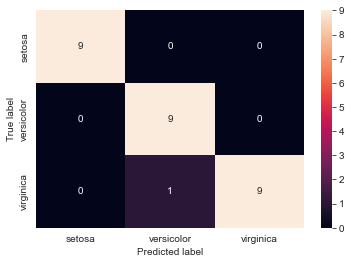

In [20]:
from sklearn.metrics import confusion_matrix

# 1. Apply confusion matrix (the labels parameter ensures that the order of the confusion matrix is equivalent to clf.classes_, we need it to know which row belongs to which species)
print('Confusion Matrix from ' + ','.join(clf.classes_))
print(confusion_matrix(y_true=y_val, y_pred=y_val_hat, labels=clf.classes_))

# Alternative: With sns.heatmap we can plot the confusion matrix with colors
sns.heatmap(
    pd.DataFrame(
        confusion_matrix(y_true=y_val, y_pred=y_val_hat, labels=clf.classes_),
        columns=[clf.classes_], # Name columns
        index=[clf.classes_] # Name rows
    ),
    annot=True # Show numbers in heatmap (not just colors)
)
plt.ylabel('True label') # Name y-axis
plt.xlabel('Predicted label') # Name x-axis
plt.show()

1\.
Die `Confusion Matrix` gibt an, wo wir richtig Vorhersagen (Diagonale) und wo wir falsch Vorhersagen (Rest) machen.
Hier betrachten wir die `Confusion Matrix` vom `Validation-Set`.
Unser Modell ist berets sehr gut (es ist ein einfacher Datensatz):
* Wir sagen 9 Mal `setosa` korrekt voraus.
* Wir sagen 9 Mal `versicolor` korrekt voraus.
* Wir sagen 9 Mal `virginica` korrekt voraus.
* Wir machen nur 1 falsche Vorhersage: Für 1 Datenpunkt sagen wir `virginica` anstatt `versicolor` voraus.

Die Nullen sind folgendermassen zu interpretieren, beispielsweise für die 0 in der ersten Zeile und der zweiten Spalte: Wir sagen 0 Mal `versicolor` anstatt `setosa` voraus.

### (Extra) Aufgabe 2.4 - Was wurde gelernt?

Die `Logistische Regression` hat folgende Form:

$
\begin{aligned}
    \phi(x^{(i)}\beta) = \phi(\beta_0 + x_1 \beta_1 + \cdots + x_p \beta_p)
\end{aligned}
$

Dies ist einfach die `Lineare Regression` mit der Sigma-Funktion $\phi$ als `Linker-Funktion`.

Da wir nur zur Zeit nur zwei Features haben, vereinfacht sich das zu:

$
\begin{aligned}
    \phi(x^{(i)}\beta) = \phi(\beta_0 + x_1 \beta_1 + x_2 \beta_2)
\end{aligned}
$

Analog zum Aufgabenblatt 2 können wir auch nachschauen, welche $\beta$s (Gewichte) gelernt wurden.

In [21]:
print("beta0", clf.intercept_)
print("beta1", clf.coef_[:, 0])
print("beta2", clf.coef_[:, 1])

beta0 [  9.70304421   3.03869563 -12.74173983]
beta1 [-2.35052466 -0.06997327  2.42049792]
beta2 [-1.02229075 -0.55821091  1.58050166]


Es wurden drei verschiedene $\beta_0$, $\beta_1$ und $\beta_2$ gelernt!

1\.
Warum ist das? Was bedeutet das?

1\.
Die klassische Logistische Regression $\phi(x^{(i)}\beta) = \phi(\beta_0 + x_1 \beta_1 + \cdots + x_p \beta_p)$ ist ein `Binärer-Classifier`, sie kann nur 2 `Klassen` unterscheiden.
`sklearn` bietet mit dem `multi_class` Parameter verschiedene Strategien an, um mit mehreren `Klassen` umzugehen.
* `auto`: Entscheidet automatisch (default `multinomial`)
* `ovr`: One-Vs-Rest (Extra) https://scikit-learn.org/stable/modules/multiclass.html#onevsrestclassifier
* `multinomial`: (Softmax) https://en.wikipedia.org/wiki/Multinomial_logistic_regression

Wir haben in unserem Datensatz 3 `Klassen` (`setosa`, `versicolor`, `virginica`) und haben der `LogisticRegression` von sklearn auch alle 3 Klassen übergeben. Ohne den `multi_class` Parameter macht die `LogisticRegression` von `sklearn` einfach eine `multinomial` Behandlung.

Bei `multinomial` trainiere wir 3 Modell-Teile zusammen (mit einer gemeinsamen Cost-Function (z.B. Softmax)):
* Ein `seposa` Teil
* Ein `versicolor` Teil
* Ein `virginica` Teil

Bei `ovr` werden explizit 3 Modelle trainiert (Modelle werde *nicht* gemeinsam trainiert):
* Ein `seposa`-vs-Rest Modell
* Ein `versicolor`-vs-Rest Modell
* Ein `virginica`-vs-Rest Modell

Darum haben wir also 3 Parameter-Paare (3 Intercepts ($\beta_0$) und 3 mal 2 Koeffizienten ($\beta_1$, $\beta_2$)).

Wir haben `One-vs-Rest` im theoretischen Teil nicht genauer angeschaut.
Hier plotten wir die 3 **zugrundeliegenden Modelle** in der jeweiligen Farbe.
(Dies war nicht Teil der Aufgabe.)

(-0.9, 3.395699999999971)

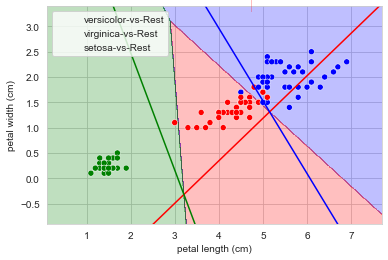

In [22]:
import numpy as np
from matplotlib.colors import ListedColormap

# Logistic Regression
clf = LogisticRegression()
clf.fit(X_train[['petal length (cm)', 'petal width (cm)']], y_train)

# Plotten der Decision Regions und  Decision Boundaries
plot_decision_regions(clf, data=X_train, x='petal length (cm)', y='petal width (cm)', colors=colors)
ax = sns.scatterplot(data=pd.concat([X_data, y_data], axis=1), x='petal length (cm)', y='petal width (cm)', hue='specie', palette=colors)

[x_min, x_max] = ax.get_xlim()
[y_min, y_max] = ax.get_ylim()

def plot_hyperplane(c: int, color: str):
    def line(x0):
        return (-(x0 * clf.coef_[c, 0]) - clf.intercept_[c]) / clf.coef_[c, 1]
    plt.plot([x_min, x_max], [line(x_min), line(x_max)], color=color)

for specie, color in colors.items():
    class_index = list(clf.classes_).index(specie)
    plot_hyperplane(class_index, color)

plt.legend([specie + '-vs-Rest' for specie in colors.keys()])

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])

Die <span style="color:green">grüne Linie</span> ist das `seposa-vs-Rest` Modell. Es kann die `seposa` Datenpunkte (grün) gut vom Rest (rot und blau) trennen.

Die <span style="color:blue">blau Linie</span> ist das `seposa-vs-Rest` Modell. Es kann die `virginica` Datenpunkte (blau) gut vom Rest (rot und grün) trennen.

Die <span style="color:red">rote Linie</span> ist das `versicolor-vs-Rest` Modell, es macht einen Kompromiss, da die Datenpunkte (rot) nicht gut **linear** vom Rest (blau und grün) trennen kann.

### Schlusswort Aufgabe 2

In Aufgabe 2 haben wir unser erstes `Classification` Modell, eine `Logistische Regression`, angewandt.
In den nächsten Aufgaben werden wir weitere `Classification` Modelle anwenden.

Für die Auswertung unseres Modelles nutzten wir `Classification` Metriken, wie die `Genauigkeit` (Accuracy) 
und die `Confusion Matrix`.
Diese Auswertungen können wir genau gleich wieder bei anderen Modellen anwenden.

Der Iris-Datensatz ist bereits **linear gut separierbar**, mit nur 2 Featuren und ohne `Feature Engineering` und ohne nicht-lineare Modelle.
Obwohl der Datensatz (zu) einfach ist bleiben wir auch für die weiteren Aufgaben auf dem Iris-Datensatz.
Es geht in den weiteren Aufgaben mehr um die Visualisierungen der Modelle, sowie dem Verständnis wie sie sich unterscheiden.

## Aufgabe 3 - Support Vector Machine

In Aufgabe 3 wenden wir `Support Vector Machinen` für die `Classification` an (`sklearn.svm.SVC`).
`Support Vector Machinen` könnten auch für die Regression benutzt werden (`sklearn.svm.SVR`), daher der Name `SVC` im `sklearn`.

### Aufgabe 3.1 - Linear Support Vector Machine

Analog zur Aufgabe 2.2 trainieren wir unser Modell vorerst auf 2 Featuren: `petal length (cm)` und `petal width (cm)`.

1. Erstellen Sie eine `sklearn.svm.SVC` mit dem linearen Kernel (`kernel='linear'`) und trainieren Sie diese auf den Features `petal length (cm)` und `petal width (cm)` vom `Train-Set` (`X_train`, `y_train`).
2. Predicten (`clf.predict`) Sie die Vorhersagen auf dem `Validation-Set` (`X_val`). Hier müssen Sie wieder die entsprechenden Features selektieren.
3. Messen Sie die Genauigkeit (englisch Accuracy) mittels `sklearn.metrics.accuracy_score` von unseren Vorhersagen `y_val_hat` und den tatsächlichen Labels `y_val`.
4. Visualisieren Sie die decision boundary von unserem Modell mit der Hilfe von der oben definierten `plot_decision_regions` Funktion. Was zeigt dieser Plot?

In [23]:
from sklearn.svm import SVC

# 1.
clf = SVC(kernel='linear')
clf.fit(X_train[['petal length (cm)', 'petal width (cm)']], y_train)

# 2.
y_val_hat = clf.predict(X_val[['petal length (cm)', 'petal width (cm)']])

# 3.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val_hat, y_val))

0.9642857142857143


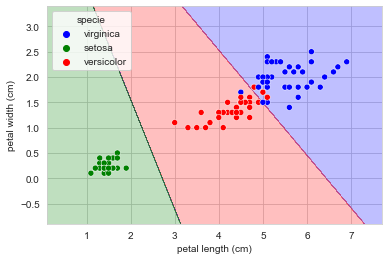

In [24]:
# 4.

# Plotten der Decision Regions und  Decision Boundaries

plot_decision_regions(clf, data=X_train, x='petal length (cm)', y='petal width (cm)', colors=colors)

# Plotten der Datenpunkte (scatter plot)
sns.scatterplot(data=pd.concat([X_data, y_data], axis=1), x='petal length (cm)', y='petal width (cm)', hue='specie', palette=colors)

plt.show()

4\.
Der Plot ist analog zur Aufgabe 2.2 die `Decision Region` unseres `Classification` Modelles. Anders als in Aufgabe 2.2 handelt es sich hier um eine `Support Vector Machine`, daher unterscheiden sich die `Decision Regions`. Der Unterschied wird in Aufgabe 3.2 erklärt.

### Aufgabe 3.2 - Logistische Regression oder Support Vector Machine

Im theoretischen Teil haben wir gesehen, wie die `Logistische Regression` und wie die `Support Vector Machine` hinter den Kullisen (innerhalb der `fit` Methode) trainiert werden.
Nutzen Sie Ihr Wissen in folgender Aufgabe.

Unten sehen Sie zwei Visualisierungen der `Decision Regions` von Aufgabe 2.2 und Aufgabe 3.1 

Logistische Regression     |  Support Vector Machine
:-------------------------:|:-------------------------:
![Logistische Regression oder SVM?](./img/lr_or_svm_2.png) |  ![Logistische Regression oder SVM?](./img/lr_or_svm_1.png)  

1. Woran man das das zugrundeliegende Modell anhand der `Decision Regions` erkennen?

1\.

Die `Logistische Regression` setzt die `Decision Boundary` zwischen `setosa` und `versicolor` betreffend allen Datenpunkten - die `Decision Boundary` geht hier nahe an einem `versicolor` Datenpunkt vorbei.

Die `Support Vector Machine` setzt die `Decision Boundary` betreffend den `Support Vectoren` (nahsten Datenpunkten), sie versucht den Abstand (`Margin`) zu nahsten Datenpunkt zu maximieren - die `Decision Boundary` ist folglich weit entfernt von allen `setosa` und `versicolor` Datenpunkten. 

Nehmen wir an neue Datenpunkte sind nahe den Datenpunkten im `Train-Set`, ist die Trennung der `Support Vector Machine` in diese Fall wahrscheinlich besser im Verallgemeinern.

### Aufgabe 3.3 - Support Vector Machine - Kernel Trick - Nicht Lineares Modell

Im theoretischen Teil haben wir den `Kernel Trick` erwähnt, den wir in der `Support Vector Machine` anwenden können, um ein nicht lineares Modell zu erhalten. Generell kann man diesen Trick in verschiedenen Modellen einsetzen (Lineare Regression, Logistische Regression, KNN, ...), er ist jedoch nur bei `Support Vector Machine` out-of-the-box in sklearn verfügbar.

Welcher Kernel wir verwenden und welche Parameter wir für einen spezifischen Kernel verwenden sind `Hyper-Parameter` vom `Support Vector Machine` Modell.

Wir können diese `Hyper-Parameter` manuell (mit Expertenwissen) setzen oder systematisch (mit `Hyper-Parameter Optimization` (Aufgabe 3.4)) finden.

1. Erstellen Sie eine `sklearn.svm.SVC` mit dem `rbf` Kernel (`kernel='rbf'`) und trainieren Sie diese auf den Features `petal length (cm)` und `petal width (cm)` vom `Train-Set` (`X_train`, `y_train`).
2. Predicten (`clf.predict`) Sie die Vorhersagen auf dem `Validation-Set` (`X_val`). Hier müssen Sie wieder die entsprechenden Features selektieren.
3. Messen Sie die `Accuracy` mittels `sklearn.metrics.accuracy_score` von unseren Vorhersagen `y_val_hat` und den tatsächlichen Labels `y_val`.
4. Visualisieren Sie die `Decision Boundary` von unserem Modell mit der Hilfe von der oben definierten `plot_decision_regions` Funktion. Was ist grundlegend anders als in der Visualisierung der `linearen Support Vector Machine` von Aufgabe 3.2?

In [25]:
from sklearn.svm import SVC

# 1.
clf = SVC(kernel='rbf')
clf.fit(X_train[['petal length (cm)', 'petal width (cm)']], y_train)

# 2.
y_val_hat = clf.predict(X_val[['petal length (cm)', 'petal width (cm)']])

# 3.
print(accuracy_score(y_val_hat, y_val))

0.9642857142857143


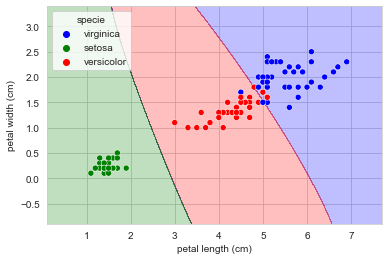

In [26]:
# 4.

# Plotten der Decision Regions und  Decision Boundaries

plot_decision_regions(clf, data=X_train, x='petal length (cm)', y='petal width (cm)', colors=colors)

# Plotten der Datenpunkte (scatter plot)
sns.scatterplot(data=pd.concat([X_data, y_data], axis=1), x='petal length (cm)', y='petal width (cm)', hue='specie', palette=colors)

plt.show()

4\.

Die `Decision Boundaries` sind dank dem `Kernel Trick` **nicht mehr linear**. Vorallem bei der `Decision Boundary` von `versicolor` und `virginica` sehen wir eine leichte Krümmung. 

Der `gamma` Parameter vom `rbf` Kernel gibt vereinfacht gesagt an "wie nicht linear" wir sind, wir können z.B. `gamma` auf 100 setzen, was das Modell flexibler macht und leider zu einem `Overfitting` führt.

Wir overfitting:  0.8214285714285714


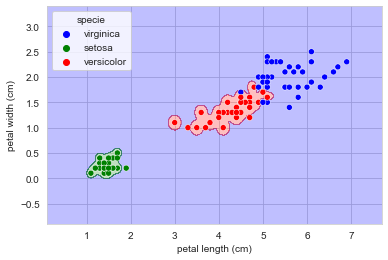

In [27]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', gamma=100)
clf.fit(X_train[['petal length (cm)', 'petal width (cm)']], y_train)
y_val_hat = clf.predict(X_val[['petal length (cm)', 'petal width (cm)']])
plot_decision_regions(clf, data=X_train, x='petal length (cm)', y='petal width (cm)', colors=colors)
sns.scatterplot(data=pd.concat([X_data, y_data], axis=1), x='petal length (cm)', y='petal width (cm)', hue='specie', palette=colors)
print("Wir overfitting: ", accuracy_score(y_val_hat, y_val))
plt.show()

### Aufgabe 3.4 - Support Vector Machine - Alle Features und Hyper-Parameter Optimization

Nun möchten wir alle Features verwenden und den Hyper-Parameter `gamma` vom `rbf` Kernel mittels `Hyper-Parameter Optimierung` finden.

Dazu können wir unterschiedliche Such-Strategien verwenden:
* `Grid Search`: Systematisch ein Grid absuchen
* `Randomized Search`: `n` Mal zufälle Parameter in einem fixen Bereich ausprobieren

Wir verwenden hier `Randomized Search`, da es in der Praxis erstaunlich oft gut funktioniert.
`sklearn` bietet bereits eine Implementierung mit `Cross Validation` für stabilere Aussagen für die einzelnen Parameter bereit namens `RandomizedSearchCV`.

1. Erstellen Sie einen fixen Bereich für den `gamma` Parameter, analog zu diesem Beispiel.
2. Erstellen Sie eine `RandomizedSearchCV` mit einer `SVC(kernel='rbf')`, dem in Schritt 1 erstellten fixen Bereich. Wählen Sie eine sinnvolle Anzahl an Iterationen (z.B. `n_iter=25`).
3. Trainieren `fit` Sie die `RandomizedSearchCV` auf dem `Data-Set` (`X_data` `y_data`).
4. Warum nehmen wir in Schritt 3 das `Data-Set` und nicht das `Train-Set`?
5. Welches Hyper-Parameter wurden gefunden (hier `gamma`)? Verwenden Sie dazu `rscv.best_params_`.

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

# 1.
param_dist = dict(
    gamma=loguniform(1e-5, 10),
)

# 2.
rs_cv = RandomizedSearchCV(SVC(kernel='rbf'), param_dist, n_iter=25)

# 3. 
# Dieser fit call trainiert für 25 zufällige gamma Werte jeweils 3 SVC Modelle und evaluiert, welches zufällige gamma im Durchschnitt am beste war.  
rs_cv.fit(X_data, y_data)

RandomizedSearchCV(estimator=SVC(), n_iter=25,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x15213cac0>})

4\.
`RandomizedSearchCV` führt intern `Cross Validations` durch, also macht es den `Train-Set`, `Validation-Set` Split bereits intern. 

In [29]:
# 5.
print(rs_cv.best_params_)
print(rs_cv.best_score_)

{'gamma': 0.32701417302195845}
0.9640316205533598


## (Extra) Aufgabe 4 - Weitere Modelle

Analog zur Aufgabe 2.2 (Logistische Regression) und Aufgabe 3.1 (Support Vector Machine), trainieren wir hier andere Classification-Modelle, um ein Gefühl für den Unterschied zu bekommen.

### (Extra) Aufgabe 4.1 - RandomForestClassifier

1. Erstellen Sie eine `sklearn.ensemble.RandomForestClassifier` und trainieren Sie diese auf den Features `petal length (cm)` und `petal width (cm)` vom `Train-Set` (`X_train`, `y_train`).
2. Predicten (`clf.predict`) Sie die Vorhersagen auf dem `Validation-Set` (`X_val`). Hier müssen Sie wieder die entsprechenden Features selektieren.
3. Messen Sie die Genauigkeit (englisch Accuracy) mittels `sklearn.metrics.accuracy_score` von unseren Vorhersagen `y_val_hat` und den tatsächlichen Labels `y_val`.
4. Visualisieren Sie die decision boundary von unserem Modell mit der Hilfe von der oben definierten `plot_decision_regions` Funktion. Was zeigt dieser Plot?

0.9285714285714286


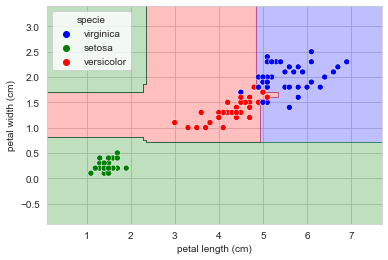

In [30]:
from sklearn.ensemble import RandomForestClassifier

# 1.
clf = RandomForestClassifier()
clf.fit(X_train[['petal length (cm)', 'petal width (cm)']], y_train)

# 2.
y_val_hat = clf.predict(X_val[['petal length (cm)', 'petal width (cm)']])

# 3.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val_hat, y_val))

# 4.
plot_decision_regions(clf, data=X_train, x='petal length (cm)', y='petal width (cm)', colors=colors)
sns.scatterplot(data=pd.concat([X_data, y_data], axis=1), x='petal length (cm)', y='petal width (cm)', hue='specie', palette=colors)
plt.show()

4\.
Binäre-Entscheidungsbäume teilen pro Knoten eine Feature-Achse in zwei Regionen auf.
`RandomForest` ist eine Ansammlung (`Ensemble`) von solchen Binären-Entscheidungsbäumen.
Wir sehen die harten Entscheidungen von den zugrundeliegenden Entscheidungsbäumen, mit klaren vertikalen und horizontalen Teilen noch in der finalen `Decision Boundary`.


### (Extra) Aufgabe 4.2 - KNN (K-Nearest-Neighbors)

1. Erstellen Sie eine `sklearn.neighbors.KNeighborsClassifier` und trainieren Sie diese auf den Features `petal length (cm)` und `petal width (cm)` vom `Train-Set` (`X_train`, `y_train`).
2. Predicten (`clf.predict`) Sie die Vorhersagen auf dem `Validation-Set` (`X_val`). Hier müssen Sie wieder die entsprechenden Features selektieren.
3. Messen Sie die Genauigkeit (englisch Accuracy) mittels `sklearn.metrics.accuracy_score` von unseren Vorhersagen `y_val_hat` und den tatsächlichen Labels `y_val`.
4. Visualisieren Sie die decision boundary von unserem Modell mit der Hilfe von der oben definierten `plot_decision_regions` Funktion. Was zeigt dieser Plot?

0.9642857142857143


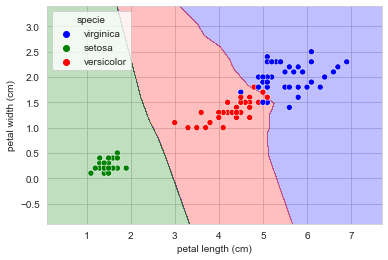

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# 1.
clf = KNeighborsClassifier()
clf.fit(X_train[['petal length (cm)', 'petal width (cm)']], y_train)

# 2.
y_val_hat = clf.predict(X_val[['petal length (cm)', 'petal width (cm)']])

# 3.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val_hat, y_val))

# 4.
plot_decision_regions(clf, data=X_train, x='petal length (cm)', y='petal width (cm)', colors=colors)
sns.scatterplot(data=pd.concat([X_data, y_data], axis=1), x='petal length (cm)', y='petal width (cm)', hue='specie', palette=colors)
plt.show()

4\.
`KNN` trainiert gar keine Parameter. Im `fit` Schritt speichert es das `Train-Set` für effizientes Abfragen in einer Baum-Datenstruktur ab.
Bei der Vorhersage (`predict`) sucht es einfach die `k` nahsten Nachbarn und sagt deren häufigste Klasse voraus.
Durch diesen Prozess erhalten wir ein nicht lineares Modell.
Mit vielen Features leidet `KNN` aber stark unter dem `Curse of Dimensionality` und kann oft schlecht verallgemeinern.

## Aufgabe 5 - Test Set

Im Setup haben wir das `Test-Set` (`X_test`, `y_test`) erstellt und beiseite gelegt. Nun wollen wir das gefundene Modell auf diesem `Test-Set` evaluieren.

1. Nehmen Sie ein Modell aus einer vorherigen Aufgabe als finales Modell.
2. Wenden Sie dieses Modell auf dem `Test-Set` (`X_test`, `y_test`) an. `X_test` muss allenfalls noch entsprechend verarbeitet werden.
3. Bestimmen Sie die Genauigkeit auf den Vorhersagen von Schritt 2 und `y_test`.

In [32]:
# 1. Wir nehmen hier das Modell vom Aufgabe 3.4
final_model = rs_cv

# 2.
y_test_hat = final_model.predict(X_test)

# 3.
print(accuracy_score(y_test, y_test_hat))

1.0


Eine Genauigkeit von 1.0 bedeutet wir haben alle Datenpunkte (100%) im `Test-Set` richtig kategorisiert - besser geht es nicht.

## Schlusswort Aufgabenblatt 3

Im Aufgabenblatt 3 haben wir die `Classification` genauer angeschaut.
Wir haben verschiedene Plots für die `Datenanalyse`, verschiedene `Metriken` und verschiedene Modelle angeschaut.
Es ist vorallem wichtig, dass Sie ein erstes Gefühl für die `Classification` bekommen haben und die Unterschiede zur Regression (Aufgabenblatt 2) klar verstehen.

Der verwendete Iris-Datensatz ist ein oft verwendeter erster Datensatz. In der Praxis hat man oft schwierigere Datensätze, dass man eine Genauigkeit von 100% erreicht ist eher unüblich und je nach Problem unmöglich.